## GOEDUHUB | Task - 12 Loan Approval Prediction  
  
## Reg - ID: GO_STP_2134  
---  
__About this file__  

Data set taken from : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/  

__Problem Statement__

__About Company__  

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

__Problem__  

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.  
  
__Dataset Description:__  

|Variable|	Description|
|:---|:---|
|Loan_ID|	Unique Loan ID|
|Gender	|Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education	|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount	|Loan amount in thousands|
|Loan_Amount_Term|	Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area|	Urban/ Semi Urban/ Rural|
|Loan_Status|	Loan approved (Y/N)|

## Import Necessary modules

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv(r'E:\Goeduhub_ML_Program_May_20\data\loan_data_set.csv')

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.shape

(614, 13)

## Preprocessing the Dataset

In [56]:
df.drop('Loan_ID',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Finding Null values

In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Filling the missing categorical values with mode values

In [61]:
categorical_col=['Gender','Married','Dependents','Self_Employed']
for i in categorical_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [62]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling the missing numerical values with median values

In [63]:
numeric_cols=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in numeric_cols:
    df[i].fillna(df[i].median(),inplace=True)

In [64]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

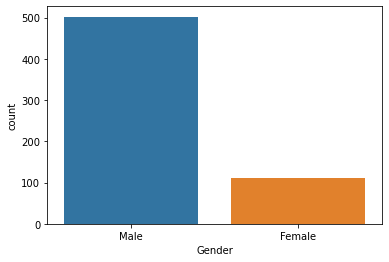

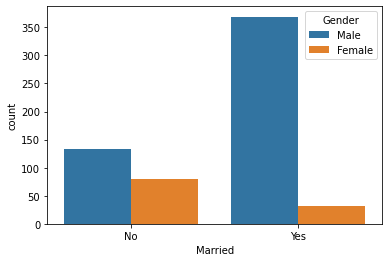

In [37]:
import warnings
warnings.filterwarnings('ignore')  


sns.countplot(df['Gender'])
plt.show()

sns.countplot(df['Married'],hue='Gender',data=df)
plt.show()

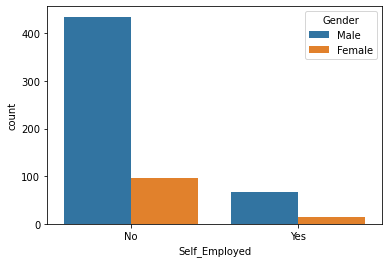

<AxesSubplot:xlabel='Dependents', ylabel='count'>

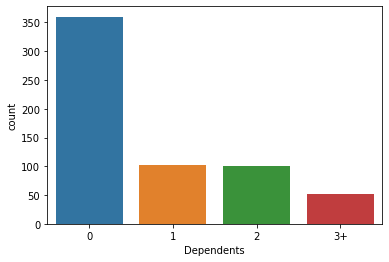

In [40]:
sns.countplot('Self_Employed',data=df,hue='Gender')
plt.show()

sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

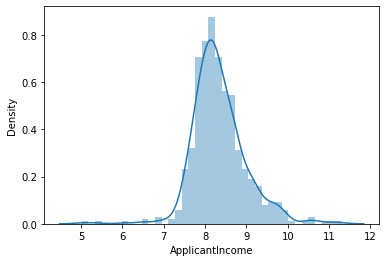

In [65]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

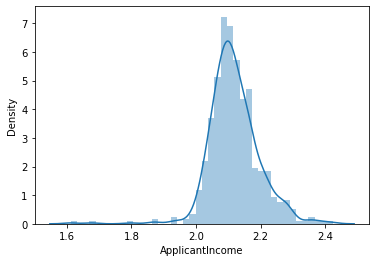

In [66]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

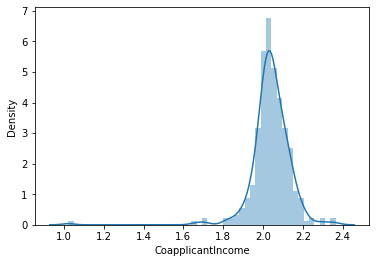

In [71]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

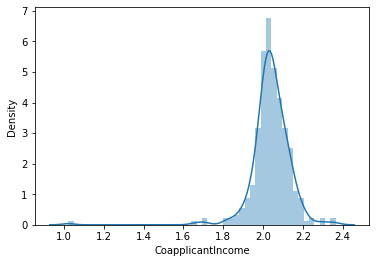

In [68]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

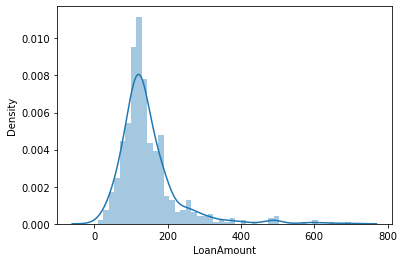

In [69]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

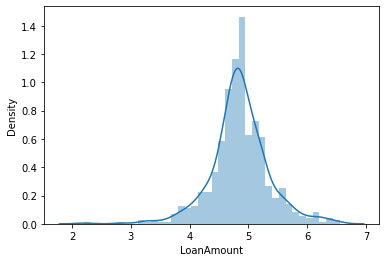

In [70]:
df['LoanAmount']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

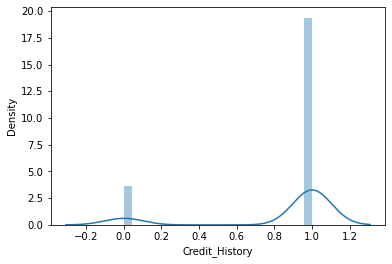

In [49]:
sns.distplot(df['Credit_History'])

In [72]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,2.160333,NaN,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,2.131810,1.990411,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,2.080237,NaN,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2.061368,2.049700,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,2.163267,NaN,4.948760,360.0,1.0,Urban,Y


In [73]:
df.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [76]:
df['CoapplicantIncome'].fillna(0,inplace=True)

In [77]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

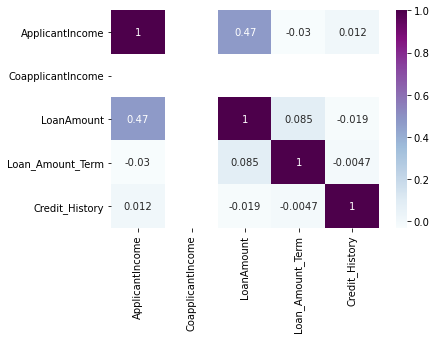

In [81]:
corre=df.corr()
sns.heatmap(corre,annot=True,cmap='BuPu')

In [83]:
df.drop('CoapplicantIncome',axis=1,inplace=True)

In [84]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,2.160333,4.852030,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,2.131810,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,2.080237,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2.061368,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,2.163267,4.948760,360.0,1.0,Urban,Y


## Label Encoding

In [91]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in cols:
    df[i]=le.fit_transform(df[i])

In [92]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,2.160333,4.852030,360.0,1.0,2,1
1,1,1,1,0,0,2.131810,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,2.080237,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,2.061368,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,2.163267,4.948760,360.0,1.0,2,1


## Train Test split

In [93]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [94]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,2.160333,4.852030,360.0,1.0,2
1,1,1,1,0,0,2.131810,4.852030,360.0,1.0,0
2,1,1,0,0,1,2.080237,4.189655,360.0,1.0,2
3,1,1,0,1,0,2.061368,4.787492,360.0,1.0,2
4,1,0,0,0,0,2.163267,4.948760,360.0,1.0,2


In [95]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

## Model Training

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [100]:
ypred=dt.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.7207792207792207


In [106]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y)
np.average(cvs)

0.7117952818872451

## Confusion Matrix

In [109]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,ypred)
cm

array([[26, 28],
       [15, 85]], dtype=int64)

<AxesSubplot:>

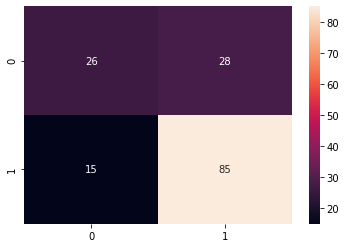

In [110]:
sns.heatmap(cm,annot=True)